In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0302_MR1_mpr-3_154.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0114_MR1_mpr-1_130.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0150_MR1_mpr-3_129.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0253_MR1_mpr-3_113.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0349_MR1_mpr-4_150.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0045_MR1_mpr-2_102.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0209_MR1_mpr-4_128.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0074_MR1_mpr-4_140.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0330_MR1_mpr-4_112.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0234_MR1_mpr-4_113.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0065_MR1_mpr-3_131.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0207_MR1_mpr-2_106.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0375_MR1_mpr-1_136.jpg
/kaggle/input/imagesoasis/Data/Non Demented/OAS1_0160_MR1_mpr-4_

In [2]:
import numpy as np 
import os
import keras
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Trying and sampling images as needed. will do 800 images ideally

creating 4 paths for the 4 image categories

In [3]:
path1 = []
path2 = []
path3 = []
path4 = []
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Non Demented'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Mild Dementia'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Moderate Dementia'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Very mild Dementia'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))

Increasing the number of images

In [4]:
path1 = path1[0:1000]
path2 = path2[0:1000]
path3 = path3[0:1000]
path4 = path4[0:1000]

In [5]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia

OneHotEncoder()

In [6]:
img_1=np.array(Image.open(path1[45]))

In [7]:
img_1.shape

(248, 496, 3)

In [8]:
data = []
result = []
for path in path1:
    img = Image.open(path)
    img = img.resize((256,256))
    img = np.array(img)
    if(img.shape == (256,256,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for path in path2:
    img = Image.open(path)
    img = img.resize((256,256))
    img = np.array(img)
    if(img.shape == (256,256,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for path in path3:
    img = Image.open(path)
    img = img.resize((256,256))
    img = np.array(img)
    if(img.shape == (256,256,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())
        
for path in path4:
    img = Image.open(path)
    img = img.resize((256,256))
    img = np.array(img)
    if(img.shape == (256,256,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

Finding the shape of the array as needed

In [9]:
data=np.array(data)
data.shape

(3488, 256, 256, 3)

Check if the target label is similar too

In [10]:
result=np.array(result)
result=result.reshape((3488,4))
result.shape

(3488, 4)

In [11]:
x_train=data
y_train=result

In [12]:
y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

Splitting into train test

In [13]:
x_train.shape

(3488, 256, 256, 3)

In [14]:
ReX_train = x_train.reshape(3488, 256 * 256 * 3)
ReX_train.shape

(3488, 196608)

In [15]:
ys_train=encoder.inverse_transform(y_train)

Applying ADASYN to Resample data

In [16]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
Xs_train, ys_train = smt.fit_resample(ReX_train, y_train)

Applying SMOTE and see what happens

In [17]:
Xs_train.shape

(4000, 196608)

In [18]:
ys_train

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [19]:
num_samples_oversampled, _ = Xs_train.shape
X_reshaped = Xs_train.reshape(num_samples_oversampled, 256, 256, 3)

In [20]:
ys_train.shape

(4000, 4)

Inverse of Encoder to check the number of pictures per category

In [21]:
y_train=encoder.inverse_transform(ys_train)

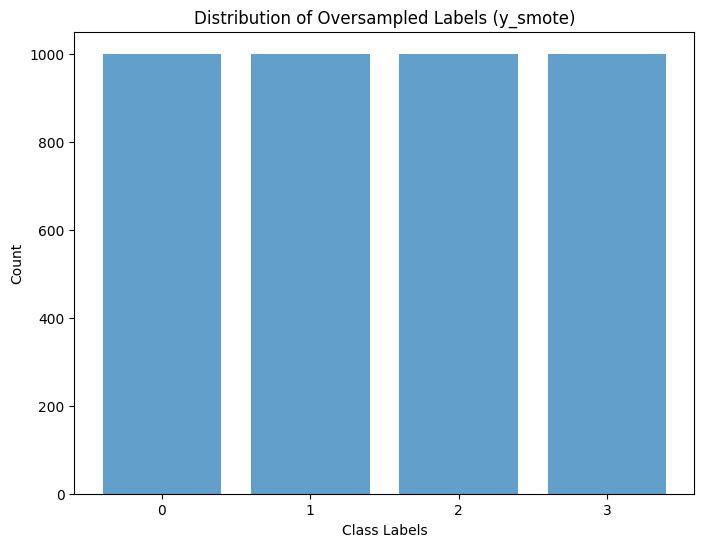

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_smote contains the oversampled labels

# Calculate unique class labels and their counts in y_smote
unique_classes, class_counts = np.unique(y_train, return_counts=True)

# Plot the distribution of the oversampled labels
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, align='center', alpha=0.7)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Distribution of Oversampled Labels (y_smote)')
plt.xticks(unique_classes)
plt.show()


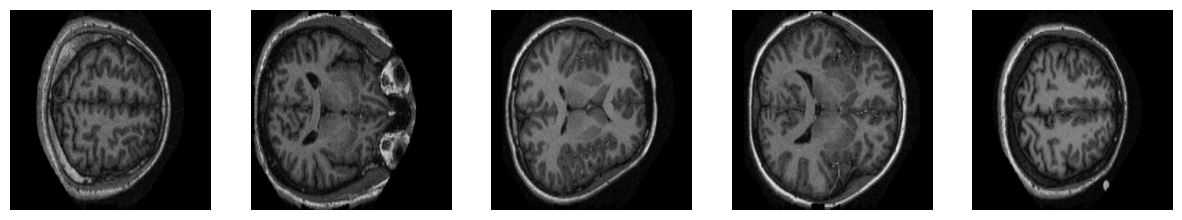

In [23]:
import matplotlib.pyplot as plt

# Assuming X_reshaped contains the oversampled images in their original 4D format (num_samples, height, width, channels)

# Choose a subset of synthetic images for visualization
num_images_to_visualize = 5  # You can change this number based on how many images you want to visualize
subset_images = X_reshaped[:num_images_to_visualize]

# Visualize the synthetic images
plt.figure(figsize=(15, 5))
for i in range(num_images_to_visualize):
    plt.subplot(1, num_images_to_visualize, i + 1)
    plt.imshow(subset_images[i])
    plt.axis('off')

plt.show()

ADDING VGG16

In [24]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

# Loading DenseNet121 model
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=X_reshaped[0].shape)
base_model.trainable = False  # Setting base layers as non-trainable

29084464/29084464 [==============================] - 0s 0us/step


creating mish activation function

In [25]:
import tensorflow as tf

def mish(x):
    return x * tf.math.tanh(tf.math.softplus(x))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.activations import softmax
from tensorflow.keras.initializers import he_normal

model = Sequential()
model.add(base_model)
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(256, 256, 3), padding='same', kernel_initializer=he_normal()))
model.add(tf.keras.layers.Activation(mish))  # Mish activation function
model.add(Conv2D(32, kernel_size=(2, 2), padding='same', kernel_initializer=he_normal()))
model.add(tf.keras.layers.Activation(mish))  # Mish activation function
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same', kernel_initializer=he_normal()))
model.add(tf.keras.layers.Activation(mish))  # Mish activation function
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same', kernel_initializer=he_normal()))
model.add(tf.keras.layers.Activation(mish))  # Mish activation function
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_initializer=he_normal()))
model.add(tf.keras.layers.Activation(mish))  # Mish activation function
model.add(Dropout(0.5))
model.add(Dense(4, activation=softmax, kernel_initializer=he_normal()))  # Softmax activation for output layer

model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

print(model.summary())

model.add(Dense(512, activation='relu'))
model.add(tf.keras.layers.Activation(mish))  # Mish activation function
model.add(Dropout(0.5))
model.add(Dense(4, activation=softmax))  # Softmax activation for output layer

model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 8, 8, 1024)        7037504   
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 32)          131104    
                                                                 
 activation (Activation)     (None, 8, 8, 32)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          4128      
                                                                 
 activation_1 (Activation)   (None, 8, 8, 32)          0         
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 32)         128       
 ormalization)                                                   
                                                        

In [27]:
X_reshaped.shape

(4000, 256, 256, 3)

Splitting data

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X_reshaped,ys_train,test_size=0.15,shuffle=True,random_state=42)

compiling model with early stop and a learning rate scheduler

In [29]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10,  restore_best_weights=True)

In [30]:
history = model.fit(x_train,y_train,epochs=60,batch_size=40,verbose=1,validation_data=(x_test,y_test),callbacks=[es])

Epoch 1/60


2023-11-07 03:51:16.287421: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


85/85 [==============================] - 28s 148ms/step - loss: 1.2819 - accuracy: 0.3871 - val_loss: 1.1663 - val_accuracy: 0.3917
Epoch 2/60
85/85 [==============================] - 8s 100ms/step - loss: 1.1161 - accuracy: 0.4426 - val_loss: 1.3495 - val_accuracy: 0.4333
Epoch 3/60
85/85 [==============================] - 8s 100ms/step - loss: 1.0231 - accuracy: 0.4653 - val_loss: 0.9823 - val_accuracy: 0.4783
Epoch 4/60
85/85 [==============================] - 8s 98ms/step - loss: 0.9262 - accuracy: 0.4891 - val_loss: 1.3788 - val_accuracy: 0.3433
Epoch 5/60
85/85 [==============================] - 8s 98ms/step - loss: 0.9305 - accuracy: 0.4912 - val_loss: 1.2553 - val_accuracy: 0.4550
Epoch 6/60
85/85 [==============================] - 8s 98ms/step - loss: 0.8846 - accuracy: 0.5056 - val_loss: 1.2645 - val_accuracy: 0.3850
Epoch 7/60
85/85 [==============================] - 8s 99ms/step - loss: 0.8688 - accuracy: 0.5188 - val_loss: 0.8249 - val_accuracy: 0.5567
Epoch 8/60
85/85 [==

heartbroken

Evaluating the model on test data

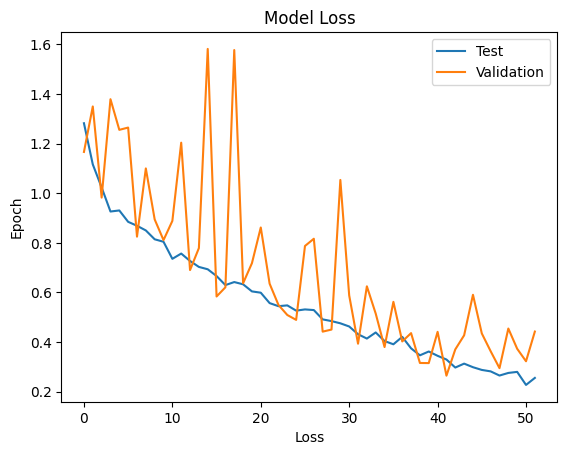

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()